# Decision Tree Classification using CHAID - Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r"train.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
test = pd.read_csv(r"test.csv")

In [8]:
test.shape

(418, 11)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis


### Handling Missing Values 

In [10]:
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

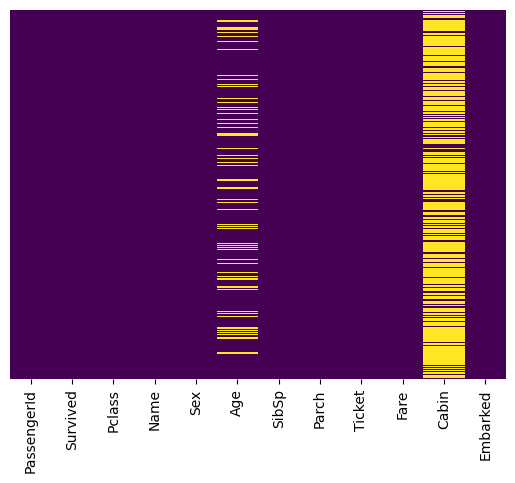

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

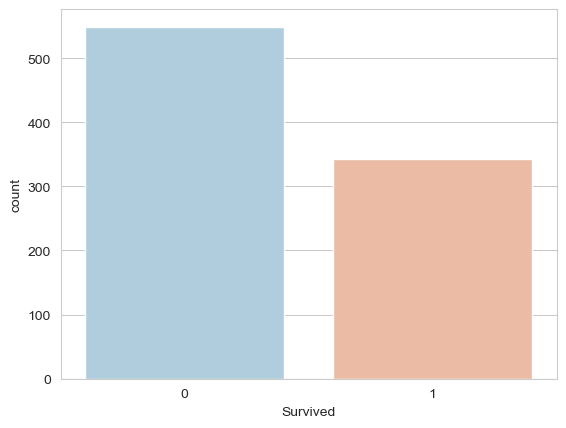

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

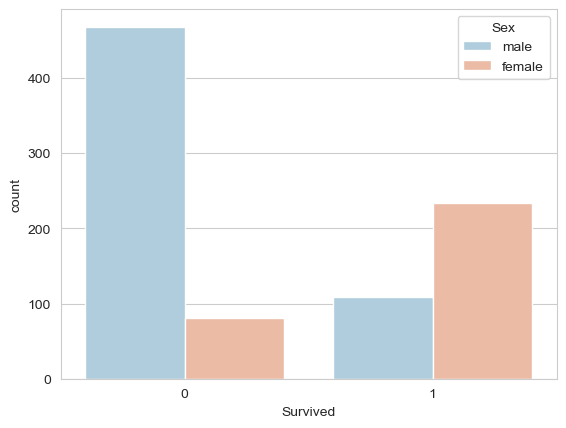

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

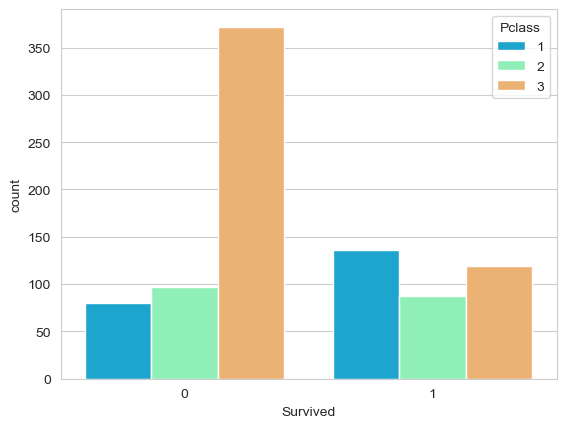

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:>

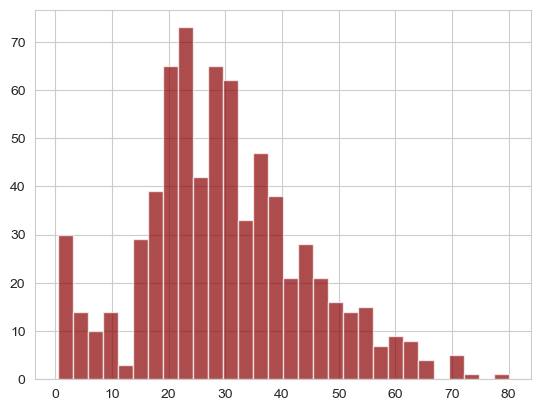

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

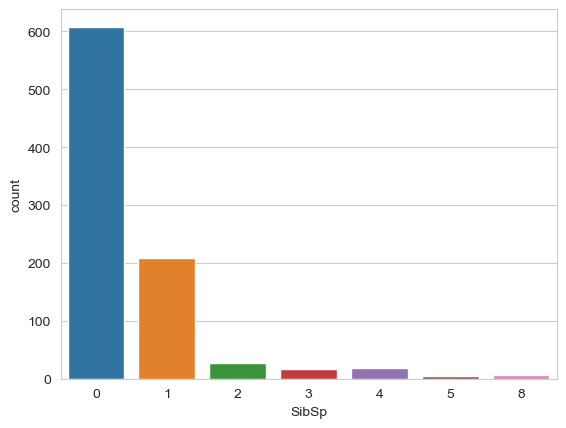

In [16]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

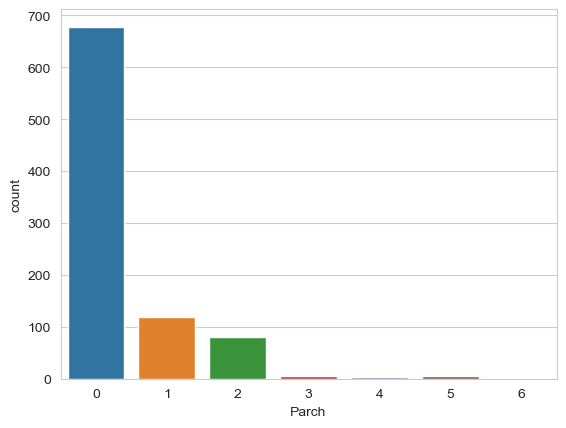

In [17]:
sns.countplot(x='Parch',data=train)

<AxesSubplot:>

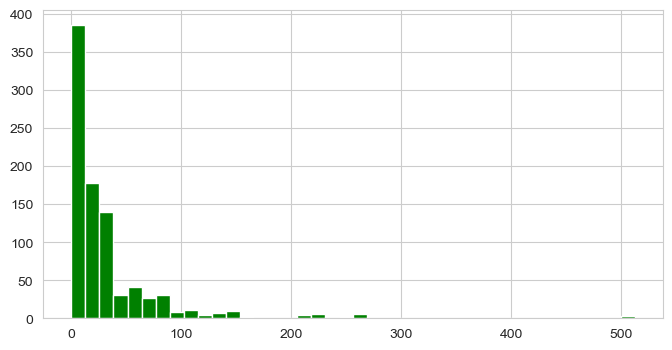

In [18]:

train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Data Cleaning

Filling in the mean age of all the passengers (imputation).

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

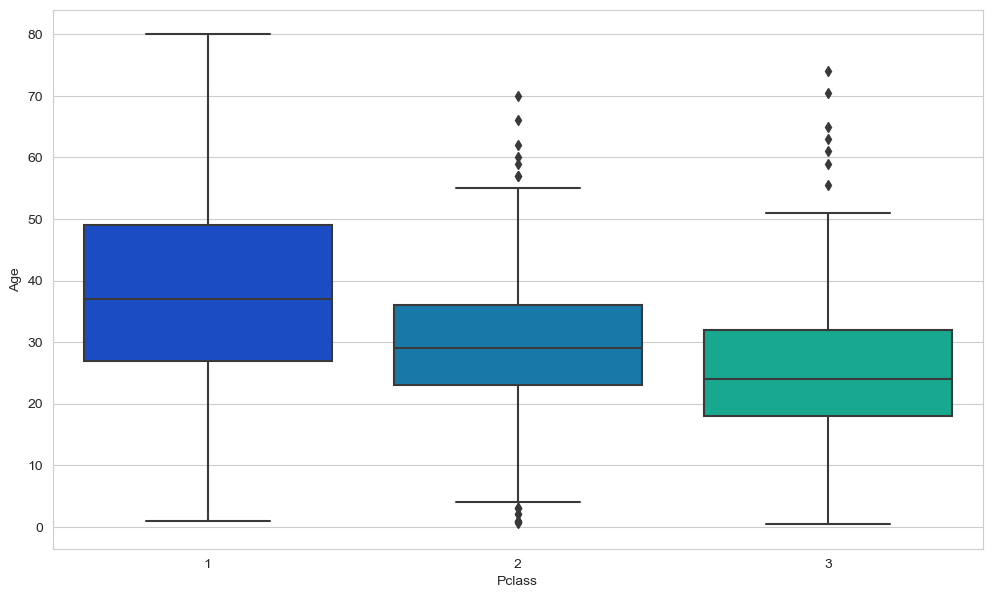

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [22]:
train['Embarked'] = train['Embarked'].fillna('S')


In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train.dropna(inplace=True)

### Converting Categorical Features

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
train = pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X = np.array(X)
y = np.array(y)

### Split the data into train and test sets

In [33]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### 1. Without using Lambda Function

In [35]:
import numpy as np

class Node:
    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [36]:
class DecisionTree:
    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=3):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            node = self.tree
            while node.feature is not None:
                if x[node.feature] <= node.threshold:
                    node = node.left
                else:
                    node = node.right
            y_pred[i] = node.value
        return y_pred
    
    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))
        
        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])
        
        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    
    def _get_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_chi2 = 0
        
        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = (sorted_X[1:] + sorted_X[:-1]) / 2
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                
                chi2 = self._get_chi2(y, left_mask, right_mask)
                
                if chi2 > best_chi2:
                    best_chi2 = chi2
                    best_feature = feature
                    best_threshold = threshold
        
        if best_feature is not None:
            return best_feature, best_threshold, best_chi2
        else:
            return None, None, None
    
    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()


In [37]:
classifier = DecisionTree()

In [38]:
import time
# record start time
start_time = time.time()

In [39]:
classifier.fit(X_train,y_train)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 2.81 seconds


In [42]:
y_pred

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

### Evaluation Metrics

In [43]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[ 75  23]
 [ 35 134]]
Accuracy 0.7827715355805244
Recall: 0.6818181818181818
Precision: 0.7653061224489796
F-score: 0.721153846153846


### 2. Using Lambda Function

In [44]:
import numpy as np

class Node1:
    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [45]:
class DecisionTree1:
    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=20):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    
    def predict(self, X):
        y_predict = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_predict

    def _traverse_tree(self, node1, x):
        if node1.feature is None:
            return node1.value
        if x[node1.feature] <= node1.threshold:
            return self._traverse_tree(node1.left, x)
        else:
            return self._traverse_tree(node1.right, x)
    
    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node1(value=self._get_leaf_value(y))
        
        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node1(value=self._get_leaf_value(y))
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])
        
        return Node1(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2
    
        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)
    
        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()


In [46]:
classifier1 = DecisionTree1()

In [47]:
import time
# record start time
start_time = time.time()

In [48]:
classifier1.fit(X_train , y_train)

In [49]:
y_predict = classifier1.predict(X_test)

In [50]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 2.81 seconds


In [51]:
y_predict

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

### Evaluation Metrics

In [52]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_predict == 1))
FP = np.sum((y_test == 0) & (y_predict == 1))
FN = np.sum((y_test == 1) & (y_predict == 0))
TN = np.sum((y_test == 0) & (y_predict == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[ 75  23]
 [ 35 134]]
Accuracy 0.7827715355805244
Recall: 0.6818181818181818
Precision: 0.7653061224489796
F-score: 0.721153846153846


### 3. Using Scikit learn

In [53]:
import time
# record start time
start_time = time.time()

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
dt_pred = dt_model.predict(X_test)
dt_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

### Evaluation Metrics

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,dt_pred))

[[124  33]
 [ 36  74]]


In [58]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.69      0.67      0.68       110

    accuracy                           0.74       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.74      0.74      0.74       267



In [59]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the code: {:.2f} seconds".format(time_taken))

Time taken to run the code: 0.49 seconds


# Comparing Results

### Evaluation Metrics Comparision

In [60]:
code1 = [2.94, "78.277 %","68.18%","76.53%","72.11%"]
df1 = pd.DataFrame({'without using lambda ': code1})

code2 = [2.92, "78.277 %","68.18%","76.53%","72.11%"]
df2 = pd.DataFrame({'With lambda': code2})

code3 = [0.51, "74 %","73%","73%","73%"]
df3 = pd.DataFrame({'using sklearn': code3})

result = ['Time stamp', 'Accuracy','Recall','Precision','F1 Score']
df4 = pd.DataFrame({'Column': result})


# display the results in a table
df = pd.concat([df4, df1, df2, df3], axis=1)

print("\n")
print(df)



       Column without using lambda  With lambda using sklearn
0  Time stamp                  2.94        2.92          0.51
1    Accuracy              78.277 %    78.277 %          74 %
2      Recall                68.18%      68.18%           73%
3   Precision                76.53%      76.53%           73%
4    F1 Score                72.11%      72.11%           73%


### Vertical bar graph for performance of model

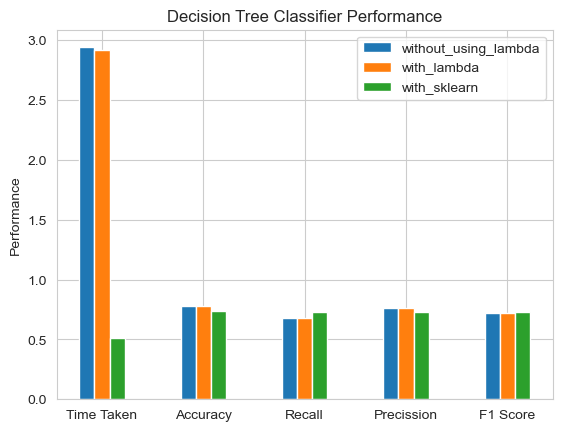

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each scenario
without_using_lambda = [2.94, 0.78277, 0.6818, 0.7653, 0.7211]
with_lambda = [2.92, 0.78277, 0.6818, 0.7653, 0.7211]
with_sklearn = [0.51, 0.74, 0.73, 0.73, 0.73]

# Define the labels for each performance measure
labels = ['Time Taken', 'Accuracy','Recall','Precission', 'F1 Score']

# Define the x-axis ticks and group labels
x = np.arange(len(labels))
group_labels = ['Without Using Lambda', 'With Lambda', 'Using sklearn ']

# Define the bar width
width = 0.15

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars for each scenario
ax.bar(x - width, without_using_lambda, width, label='without_using_lambda')
ax.bar(x, with_lambda, width, label='with_lambda')
ax.bar(x + width, with_sklearn, width, label='with_sklearn')

# Add labels, title, and legend
ax.set_ylabel('Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Decision Tree Classifier Performance')
ax.legend()

# Show the plot
plt.show()

### Horizontal bar graph for performance of model

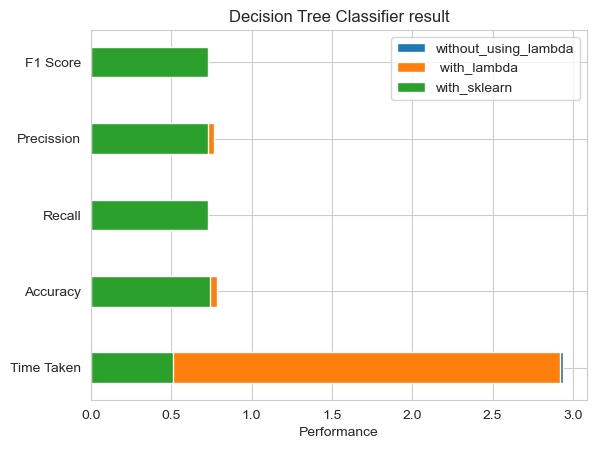

In [75]:
import matplotlib.pyplot as plt

# Define the data
without_using_lambda = [2.94, 0.78277, 0.6818, 0.7653, 0.7211]
with_lambda = [2.92, 0.78277, 0.6818, 0.7653, 0.7211]
with_sklearn = [0.51, 0.74, 0.73, 0.73, 0.73]
labels = ['Time Taken', 'Accuracy','Recall','Precission', 'F1 Score']

# Define the y-axis ticks and group labels
y = np.arange(len(labels))
group_labels = ['Without Using Lambda', 'With Lambda', 'Using sklearn ']

# Define the bar height
height = 0.4


# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars

ax.barh(y, without_using_lambda, height, label='without_using_lambda')
ax.barh(y, with_lambda, height, label=' with_lambda')
ax.barh(y, with_sklearn, height, label='with_sklearn')

# Add labels, title, and legend
ax.set_xlabel('Performance')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.set_title('Decision Tree Classifier result')
ax.legend()

# Show the plot
plt.show()


### Line Graph

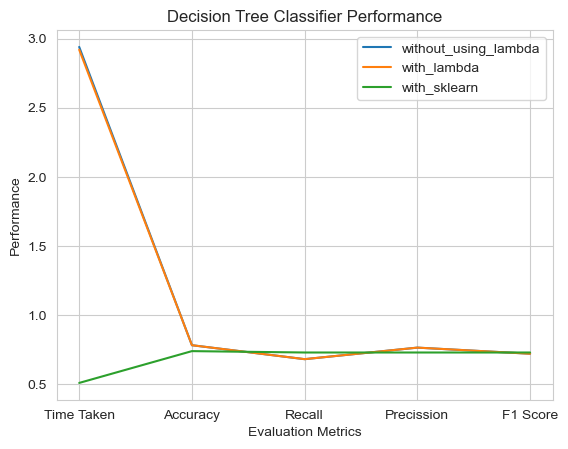

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for each scenario
without_using_lambda = [2.94, 0.78277, 0.6818, 0.7653, 0.7211]
with_lambda = [2.92, 0.78277, 0.6818, 0.7653, 0.7211]
with_sklearn = [0.51, 0.74, 0.73, 0.73, 0.73]

# Define the labels for each performance measure
labels = ['Time Taken', 'Accuracy','Recall','Precission', 'F1 Score']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, without_using_lambda, label='without_using_lambda')
ax.plot(x, with_lambda, label='with_lambda')
ax.plot(x, with_sklearn, label='with_sklearn')

# Add labels, title, and legend
ax.set_xlabel('Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Decision Tree Classifier Performance')
ax.legend()

# Show the plot
plt.show()

### Confusion Matrix

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix of model Without using lambda is ")
print(confusion_matrix(y_test,y_pred))
print("\nConfusion Matrix of model Using lambda is ")
print(confusion_matrix(y_test,y_predict))
print("\nConfusion Matrix of model Using sklearn is ")
print(confusion_matrix(y_test,dt_pred))




Confusion Matrix of model Without using lambda is 
[[134  23]
 [ 35  75]]

Confusion Matrix of model Using lambda is 
[[134  23]
 [ 35  75]]

Confusion Matrix of model Using sklearn is 
[[124  33]
 [ 36  74]]
